Using TensorFlow backend.


4423680/4422102 [==============================] - 2s 0us/step
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.5349 - accuracy: 0.4426 - val_loss: 0.4629 - val_accuracy: 1.2755e-07
Epoch 2/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.4322 - accuracy: 0.4871 - val_loss: 0.4064 - val_accuracy: 1.2755e-07
Epoch 3/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.4003 - accuracy: 0.4907 - val_loss: 0.3876 - val_accuracy: 1.2755e-07
Epoch 4/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.3851 - accuracy: 0.4933 - val_loss: 0.3723 - val_accuracy: 1.2755e-07
Epoch 5/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.3719 - accuracy: 0.4957 - val_loss: 0.3586 - val_accuracy: 1.2755e-07
Epoch 6/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.3609 - accuracy: 0.4976 - val_loss: 0.3471 - val_ac

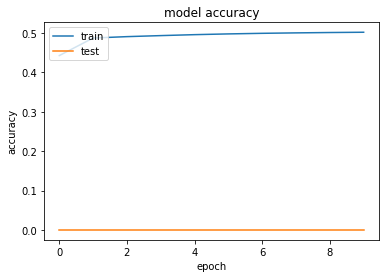

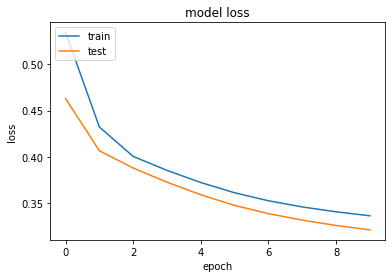

In [1]:
# -*- coding: utf-8 -*-
"""ML_ICP6_3&4.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/14GWWi8XO2VDbCIXhFylUl-bJ7DJI_OXm
"""

from keras.layers import Input, Dense
from keras.models import Model


# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

#seperate encoder model
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

#let's create a seperate decoder model
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))


autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics = ['accuracy'])

from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

history = autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

[train_loss, train_acc] = autoencoder.evaluate(x_train_noisy, x_train)
[test_loss, test_acc] = autoencoder.evaluate(x_test_noisy, x_test)

print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))
print("Evaluation result on Train Data : Loss = {}, accuracy = {}".format(train_loss, train_acc))
print(history.history.keys())

# use Matplotlib 
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()